In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_max_discharge_capacity(directory):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer une figure pour le graphique
    plt.figure(figsize=(12, 6))  # Augmenter la largeur de la figure

    # Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Calculer le maximum de Discharge Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

        # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
        plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)

    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title('Maximum Discharge Capacity vs Cycle Index')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    plt.show()





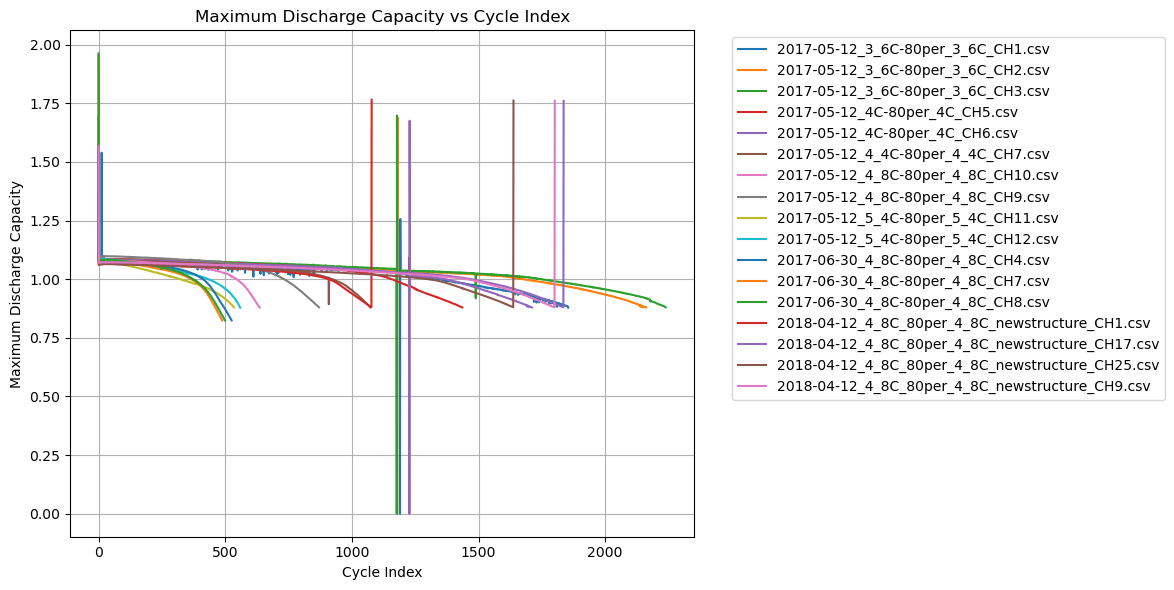

In [9]:

# Exemple d'utilisation
directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_max_discharge_capacity(directory)

Time vs Discharge-Capacity

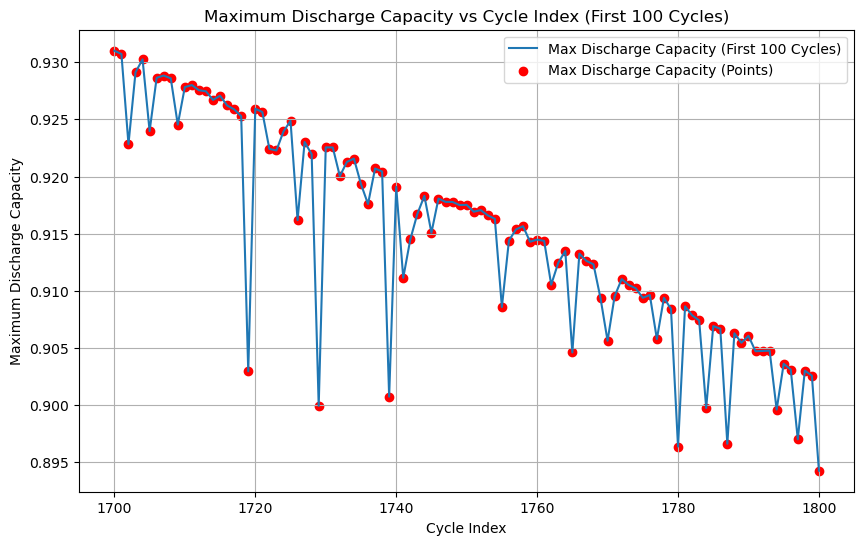

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Charger les données depuis le fichier CSV
file_path = r'C:\Users\pc\Desktop\data\batch 1\2017-05-12_3_6C-80per_3_6C_CH1.csv'
dfs = pd.read_csv(file_path)

# Supprimer les lignes où Cycle_Index est égal à 0, 1190, 1191, et 12
df = dfs[(dfs['Cycle_Index'] != 0) & (dfs['Cycle_Index'] != 1191) & (dfs['Cycle_Index'] != 1190) & (dfs['Cycle_Index'] != 12)]

# Filtrer pour les 100 premiers cycles
df_100 = df[(df['Cycle_Index'] >= 1700)&(df['Cycle_Index'] <= 1800)]

# Étape 2 : Calculer le maximum de Discharge Capacity par Cycle_Index pour les 100 premiers cycles
max_discharge_capacity_100 = df_100.groupby('Cycle_Index')['Discharge_Capacity'].max()



# Étape 3 : Tracer les données avec matplotlib
plt.figure(figsize=(10, 6))

# Tracer les données avec une ligne continue
plt.plot(max_discharge_capacity_100.index, max_discharge_capacity_100.values, label='Max Discharge Capacity (First 100 Cycles)', linestyle='-')

# Tracer les données avec des points
plt.scatter(max_discharge_capacity_100.index, max_discharge_capacity_100.values, color='red', label='Max Discharge Capacity (Points)')


# Ajouter des titres et des labels
plt.title('Maximum Discharge Capacity vs Cycle Index (First 100 Cycles)')
plt.xlabel('Cycle Index')
plt.ylabel('Maximum Discharge Capacity')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()


Le maximum de Discharge Capacity parmi les 100 premiers cycles est 1.08 au cycle 88.0


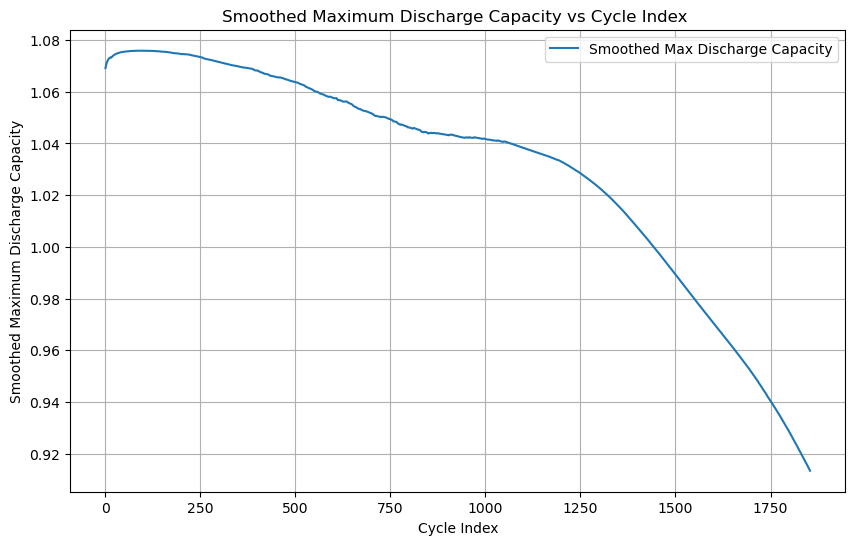

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Charger les données depuis le fichier CSV
file_path = r'C:\Users\pc\Desktop\data\batch 1\2017-05-12_3_6C-80per_3_6C_CH1.csv'
dfs = pd.read_csv(file_path)

# Supprimer les lignes où Cycle_Index est égal à 0, 1190, 1191, et 12
df = dfs[(dfs['Cycle_Index'] != 0) & (dfs['Cycle_Index'] != 1191) & (dfs['Cycle_Index'] != 1190) & (dfs['Cycle_Index'] != 12)]

# Filtrer pour les 100 premiers cycles
df_100 = df

# Étape 2 : Calculer le maximum de Discharge Capacity par Cycle_Index pour les 100 premiers cycles
max_discharge_capacity_100 = df_100.groupby('Cycle_Index')['Discharge_Capacity'].max()

# Appliquer la moyenne mobile pour lisser les données
window_size = 200 # Vous pouvez ajuster la taille de la fenêtre selon vos besoins
smoothed_max_discharge_capacity = max_discharge_capacity_100.rolling(window=window_size, min_periods=1).mean()

# Récupérer le cycle où le Discharge Capacity est le plus élevé parmi les 100 premiers cycles
max_value_100 = smoothed_max_discharge_capacity.max()
max_cycle_index = smoothed_max_discharge_capacity.idxmax()

print(f'Le maximum de Discharge Capacity parmi les 100 premiers cycles est {max_value_100:.2f} au cycle {max_cycle_index}')

# Étape 3 : Tracer les données avec matplotlib
plt.figure(figsize=(10, 6))

# Tracer les données lissées
plt.plot(smoothed_max_discharge_capacity.index, smoothed_max_discharge_capacity.values, label='Smoothed Max Discharge Capacity')


# Ajouter des titres et des labels
plt.title('Smoothed Maximum Discharge Capacity vs Cycle Index ')
plt.xlabel('Cycle Index')
plt.ylabel('Smoothed Maximum Discharge Capacity')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()


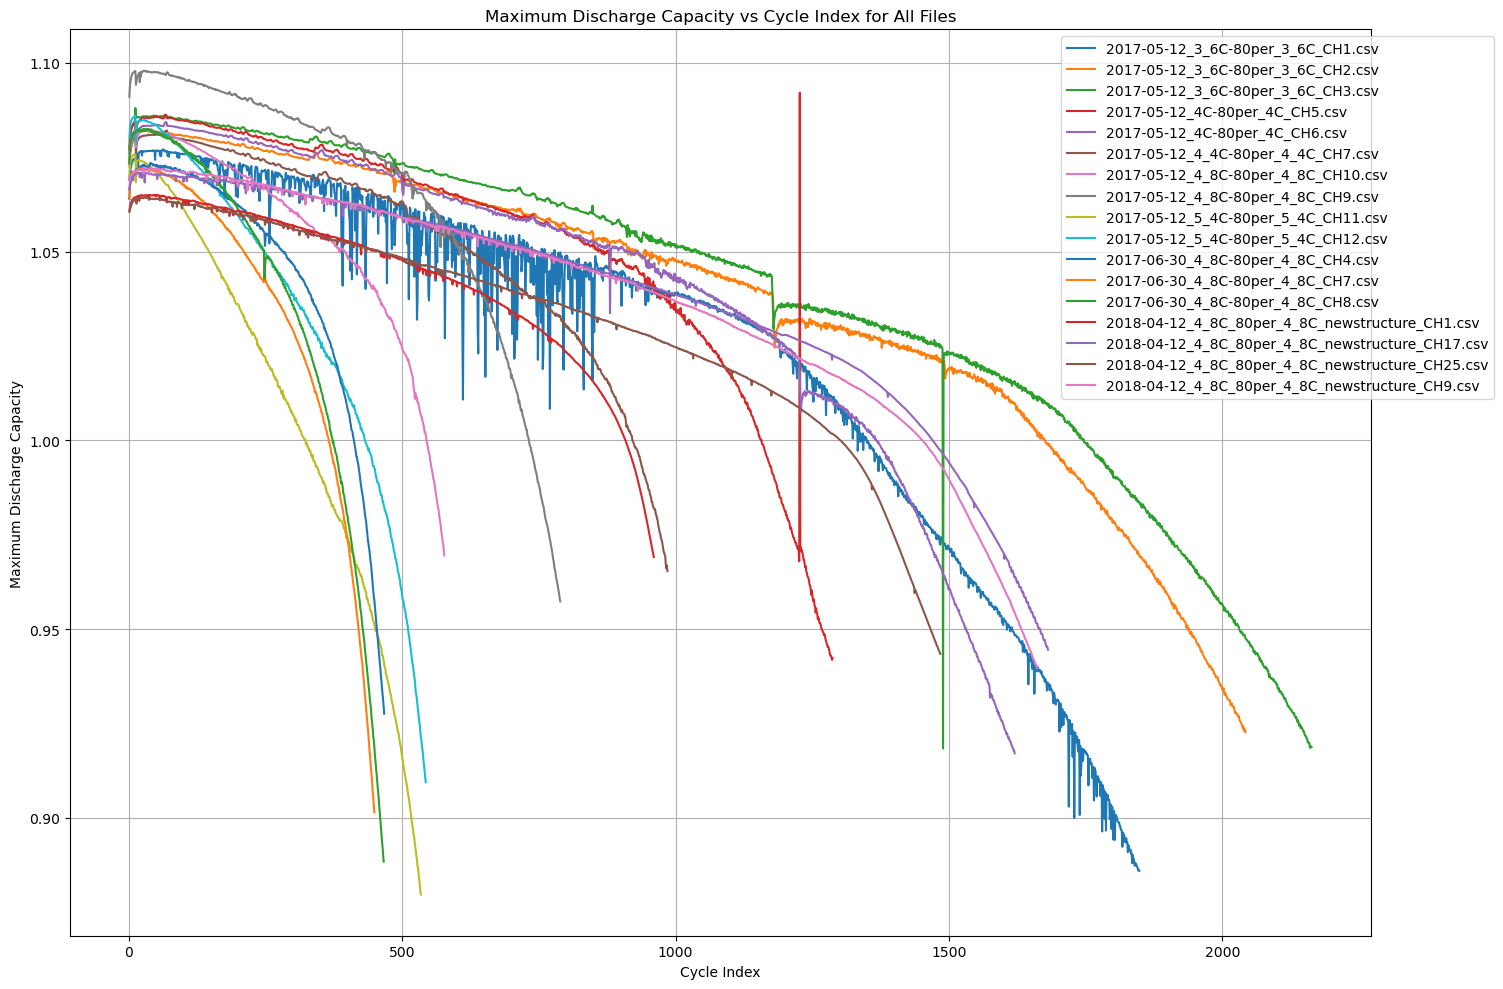

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def remove_outliers(series):
    # Calculer le premier et le troisième quartile
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    # Définir les limites pour les valeurs aberrantes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les valeurs aberrantes
    return series[(series >= lower_bound) & (series <= upper_bound)]

def plot_all_files_together(directory):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer une figure pour le graphique
    plt.figure(figsize=(15, 10))

    # Tracer les données de chaque fichier CSV sur le même graphique
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Calculer le maximum de Discharge Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

        # Supprimer les valeurs aberrantes
        max_discharge_capacity_clean = remove_outliers(max_discharge_capacity)

        # Tracer les données
        plt.plot(max_discharge_capacity_clean.index, max_discharge_capacity_clean.values, label=csv_file)

    # Ajouter des labels et un titre
    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title('Maximum Discharge Capacity vs Cycle Index for All Files')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible

    # Afficher le graphique
    plt.show()

directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_all_files_together(directory)
